In [2]:
# MLP와 binary classification 예제
import torch
import matplotlib.pyplot as plt

# 데이터 모으기

In [3]:
# case1
N = 20 # 총 데이터 수
random0 = torch.randn(int(N/2), 1)  # 이건 평균 0, 표준편차 1인 정규분포에서 뽑은 난수 10개 10 x 1 크기의 텐서
random5 = torch.randn(int(N/2), 1) + 5 # 이건 평균 5, 표준편차 1인 정규분포에서 뽑은 난수 10개 10 x 1 크기의 텐서
class1_data = torch.hstack([random0,random5]) # hstack => 수평방향으로 텐서 합치기 20 x 2 크기의 텐서로 나옴
class2_data = torch.hstack([random5,random0])
class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
X = torch.vstack([class1_data, class2_data])
Y = torch.vstack([class1_label, class2_label]) 


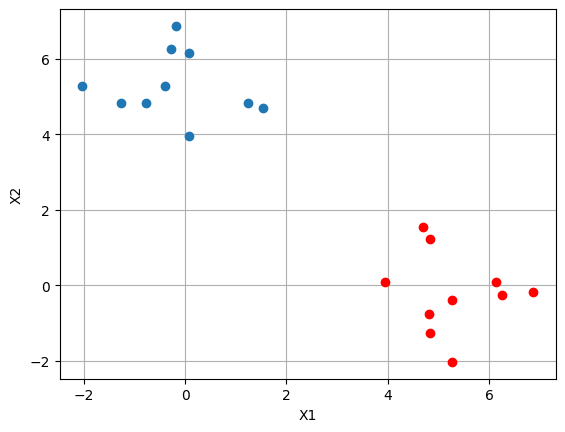

In [4]:
plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
# 위쪽이 label 1, 아래쪽이 label 0임


In [5]:
# binary classification 하기
# 1. 데이터 모으기 이건 위에서 함
# 2. 모델 만들기
# 3. 모델 학습
# 4. 모델 테스트

In [6]:
# 2. 모델 만들기
from torch import nn 

class MLP(nn.Module): # nn.Module을 상속받음 nn.Module: 파이토치에서 신경망 모델을 만들 때 사용하는 기본 클래스
    def __init__(self): # self는 클래스의 인스턴스를 가리키는 매개변수 그리고 __init__는 생성자 메서드
        super().__init__() # 이건 부모 클래스의 init 함수를 호출하는 것 super()는 부모 클래스를 참조하는 함수

        # case 1, plain MLP
        self.linear = nn.Sequential(nn.Linear(2, 100), # 입력층 2개, 은닉층 100개 hyperparameter는 내가 정함 100개는 나중에 바꿔가면서 함
                                    nn.Sigmoid(), # 활성화 함수
                                    nn.Linear(100, 1), # 출력층 1개
                                    nn.Sigmoid()) # 활성화 함수
        # nn.Sequential은 여러 층을 순차적으로 쌓을 때 사용하는 함수
        # nn.Linear(2,100)은 입력이 2차원이고 출력이 100차원인 선형 변환 층을 의미
        # nn.Linear(100,1)은 입력이 100차원이고 출력이 1차원인 선형 변환 층을 의미
        # 이 모델은 2개에서 100개로 변환한 후 다시 1개로 변환하는 구조임

        # # case 1, very simple MLP
        # self.linear = nn.Sequential(nn.Linear(2, 1),
        #                             nn.Sigmoid())
        # 이 모델은 2개에서 1개로 바로 변환하는 구조임
        # # case 1, Deep MLP
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        # 이 모델은 2개에서 100개, 100개, 100개, 1개로 변환 
        

    def forward(self, x):
        x = self.linear(x)
        return x
        # 이 def forward(self, x):는 모델의 순전파를 정의하는 메서드임 무조건 있어야 함
# 따라서 MLP 클래스는 
# class MLP(nn.Module):
#     def __init__(self):
#         super().__init__() 와 
# -------------중간 코드-------------
# def forward(self, x):
# x = self.linear(x)
# return x 
# 가 반드시 있어야 함

In [7]:
model = MLP()
print(model)

model.eval()
print(model(torch.randn(5,2)).shape)
# torch.randn(5,2)가 의미하는건 5개의 샘플에 대해 2개의 특성을 가진 랜덤한 입력 데이터임.

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


# 3. 모델 학습시키기

In [8]:
from torch import optim # 옵티마이저 불러오기

LR = 1e-1 # learning rate 설정 1e-1 = 0.1
# 1e - 1 = 1 * 10^(-1) = 0.1
EPOCH = 100 
optimizer = optim.SGD(model.parameters(), lr=LR) # SGD 옵티마이저 사용 model.parameters()는 모델의 모든 학습 가능한 매개변수를 반환 lr은 learning rate 설정
criterion = nn.BCELoss() # 이진 분류에서 사용하는 손실 함수 Binary Cross Entropy Loss 이것도 내가 정함

loss_history = [] # 손실 값을 저장할 리스트
grad_history = [] # 그래디언트 값을 저장할 리스트
update_size_history = [] # 업데이트 크기를 저장할 리스트

model.train() # 모델을 학습 모드로 설정
for ep in range(EPOCH):
    # inference
    y_hat = model(X) # 모델에 입력 데이터 X를 넣어 예측값 y_hat을 얻음
    # loss 계산
    loss = criterion(y_hat, Y)
    optimizer.zero_grad() # 옵티마이저의 그래디언트를 초기화
    loss.backward() # 역전파 수행하여 그래디언트 계산
    optimizer.step() # 옵티마이저를 사용하여 모델의 매개변수 업데이트
    #print loss
    loss_history += [loss.item()] # loss.item()은 텐서에서 스칼라 값을 추출하는 메서드
    print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
    print("-")

    


Epoch: 1, train loss: 0.7432
-
Epoch: 2, train loss: 0.5749
-
Epoch: 3, train loss: 0.4658
-
Epoch: 4, train loss: 0.3874
-
Epoch: 5, train loss: 0.3293
-
Epoch: 6, train loss: 0.2852
-
Epoch: 7, train loss: 0.2508
-
Epoch: 8, train loss: 0.2233
-
Epoch: 9, train loss: 0.2011
-
Epoch: 10, train loss: 0.1826
-
Epoch: 11, train loss: 0.1672
-
Epoch: 12, train loss: 0.1541
-
Epoch: 13, train loss: 0.1428
-
Epoch: 14, train loss: 0.1331
-
Epoch: 15, train loss: 0.1245
-
Epoch: 16, train loss: 0.1170
-
Epoch: 17, train loss: 0.1103
-
Epoch: 18, train loss: 0.1043
-
Epoch: 19, train loss: 0.0990
-
Epoch: 20, train loss: 0.0941
-
Epoch: 21, train loss: 0.0897
-
Epoch: 22, train loss: 0.0857
-
Epoch: 23, train loss: 0.0820
-
Epoch: 24, train loss: 0.0786
-
Epoch: 25, train loss: 0.0755
-
Epoch: 26, train loss: 0.0726
-
Epoch: 27, train loss: 0.0699
-
Epoch: 28, train loss: 0.0675
-
Epoch: 29, train loss: 0.0651
-
Epoch: 30, train loss: 0.0630
-
Epoch: 31, train loss: 0.0610
-
Epoch: 32, train 

In [10]:
print(criterion(y_hat, Y)) # criterion(y_hat, Y)는 예측값 y_hat과 실제값 Y 사이의 손실 값을 계산함
print(torch.sum(-torch.log( y_hat**Y * (1 - y_hat)**(1 - Y)))/ N) # 수식으로 직접 계산한 binary cross entropy loss 값
print(criterion(torch.tensor([0.]), torch.tensor([1.]))) # 이건 예측값이 0이고 실제값이 1일 때의 손실 값을 계산 100이나오는 이유는 -log(0) = 무한대 이므로 아주 큰 값으로 표현됨

tensor(0.0188, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0188, grad_fn=<DivBackward0>)
tensor(100.)


Text(0, 0.5, 'Loss')

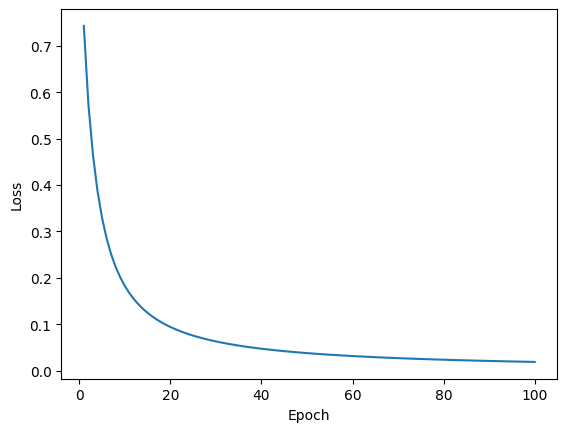

In [12]:
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')